# KT 코로나 시각화 경진대회 - 대구와 서울을 중심으로 데이터 비교

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [39]:
from matplotlib import font_manager, rc
# window >
font_name = font_manager.FontProperties(fname="/Windows/Fonts/NanumGothicCoding.ttf").get_name()
# # gram >
# font_name = font_manager.FontProperties(fname="/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

**데이터 불러오기**

In [4]:
# COVID DATA
case=pd.read_csv('./KTdata/COVID_19/Case.csv')
timeprovince=pd.read_csv('./KTdata/COVID_19/TimeProvince.csv')

# KT DATA
adstrd=pd.read_csv('./KTdata/adstrd_master.csv')
delivery=pd.read_csv('./KTdata/delivery.csv')

In [1]:
!pip install IPython
from IPython.display import Image

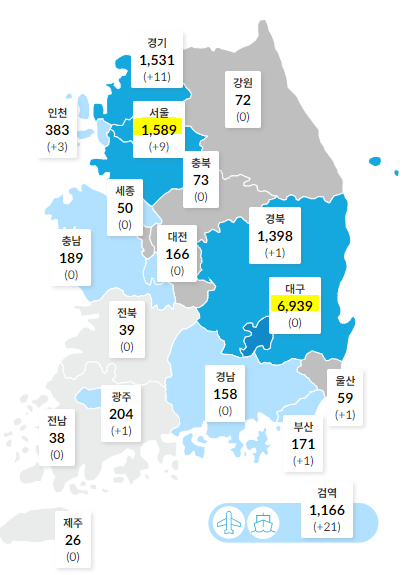

In [2]:
Image('./corona.png')

[출처 : 코로나바이러스감염증-19(COVID-19)](http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=)

한국의 코로나 바이러스 감염은 대구와 서울 경기 경북 순으로 규모가 크다.\
이 중 대구와 서울 두 지역을 중심으로 POST CORONA 분석을 진행했다.

## COVID_19 : case

먼저 지역별 코로나 바이러스 발생 현황을 알아보았다.\
발생 지역에 따른 감염경로, 확진자 수를 합산하여 나타내는 자료를 분석하였다.

In [7]:
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,서울,용산구,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,서울,관악구,True,Richway,119,37.48208,126.901384
2,1000003,서울,구로구,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,서울,양천구,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,서울,도봉구,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,경상남도,-,False,etc,20,-,-
170,7000001,제주도,-,False,overseas inflow,14,-,-
171,7000002,제주도,-,False,contact with patient,0,-,-
172,7000003,제주도,-,False,etc,4,-,-


In [8]:
case_sd = case[(case['province']=='대구') | (case['province']=='서울')]

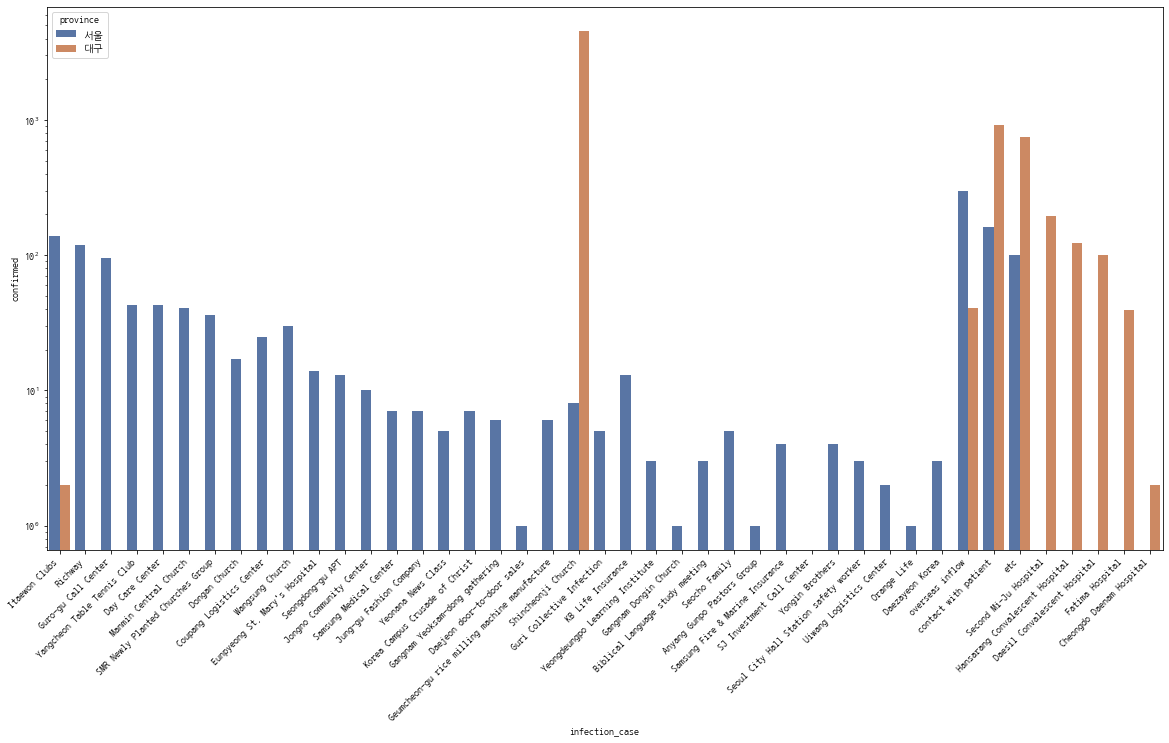

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(data = case_sd, x = 'infection_case', y = 'confirmed', hue='province', palette="deep")
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')

대구와 서울의 감염경로 수를 기준으로 비교하였을 때,\
대구는 신천지 교회, 감염자 접촉, 기타, 병원, 해외 유입, 이태원 클럽 순으로 많았고,\
서울은 해외 유입, 감염자 접촉, 기타, 이태원 클럽, 리치웨이, 구로구 콜센터 순으로 많았다.\
대구의 신천지 교회 감염의 볼륨이 너무 커서 다른 감염 경로 및 서울의 감염 정보와 비교가 어려워 y축인 확진 수에 log를 적용하여 스케일링을 하였다.

## COVID_19 : timeprovince

시계열로 나타낸 지역별 확진, 격리해제, 사망자 추이

In [18]:
timeprovince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,서울,0,0,0
1,2020-01-20,16,부산,0,0,0
2,2020-01-20,16,대구,0,0,0
3,2020-01-20,16,인천,1,0,0
4,2020-01-20,16,광주,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,전라북도,27,21,0
2767,2020-06-30,0,전라남도,24,19,0
2768,2020-06-30,0,경상북도,1389,1328,54
2769,2020-06-30,0,경상남도,134,128,0


In [19]:
timeprov_sd = timeprovince[(timeprovince['province']=='대구') | (timeprovince['province']=='서울')]

In [20]:
# date에서 month만 추출
def grap_month(data):
    data = str(data)
    return str(data[6:7])+'월'

timeprov_sd['month'] = timeprov_sd['date'].apply(lambda x: grap_month(x))

C:\Users\sundooedu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


월별 비교를 위해 date 컬럼에서 월만 추출하였다.

In [21]:
timeprov_sd

,date,time,province,confirmed,released,deceased,month
0,2020-01-20,16,서울,0,0,0,1월
2,2020-01-20,16,대구,0,0,0,1월
17,2020-01-21,16,서울,0,0,0,1월
19,2020-01-21,16,대구,0,0,0,1월
34,2020-01-22,16,서울,0,0,0,1월
...,...,...,...,...,...,...,...
2722,2020-06-28,0,대구,6904,6700,189,6월
2737,2020-06-29,0,서울,1305,942,7,6월
2739,2020-06-29,0,대구,6906,6700,189,6월
2754,2020-06-30,0,서울,1312,985,7,6월


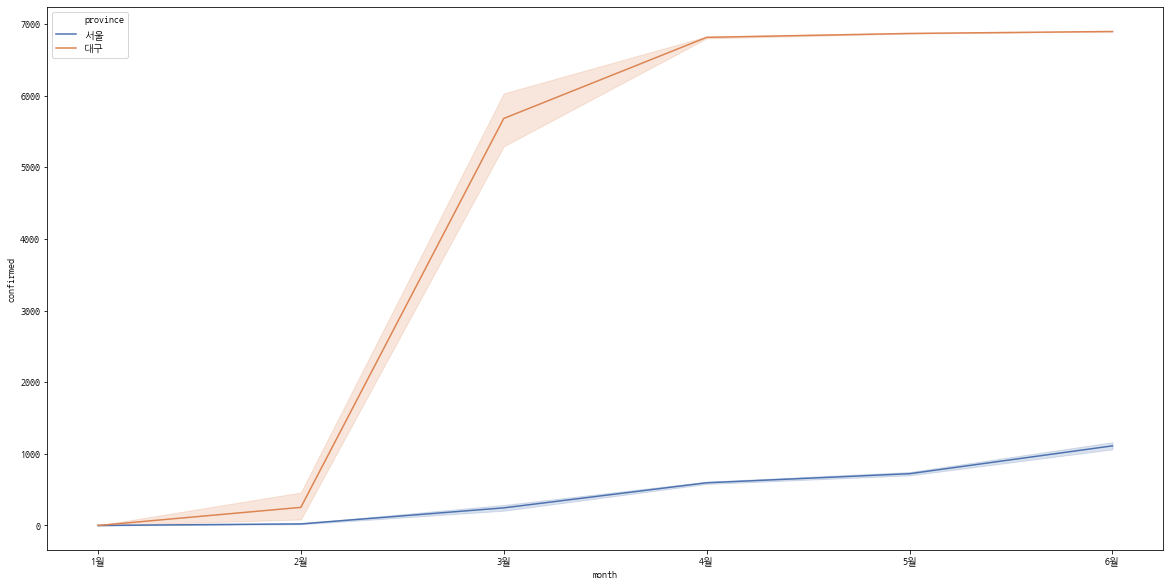

In [42]:
plt.figure(figsize = (20,10))
sns.lineplot(data = timeprov_sd, x ='month', y ='confirmed', hue='province', palette="deep")

[대구 신천지 확진자 발생(2020.02.28)](https://search.naver.com/search.naver?where=news&query=%EB%8C%80%EA%B5%AC%20%EC%8B%A0%EC%B2%9C%EC%A7%80%20%EB%B0%9C%EC%83%9D&sm=tab_srt&sort=2&photo=0&field=0&reporter_article=&pd=3&ds=2020.02.01&de=2020.03.31&docid=&nso=so%3Ada%2Cp%3Afrom20200201to20200331%2Ca%3Aall&mynews=0&refresh_start=0&related=0)으로 2월 이후 확진자 수가 급증한 것으로 보이며,\
서울은 비교적 완만한 증가 추세를 보인다.

---

## adstrd (행정동 코드)

In [23]:
adstrd.adstrd_code = adstrd.adstrd_code.astype(int)
adstrd

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580,서홍동,제주특별자치도,서귀포시
3489,50130590,대륜동,제주특별자치도,서귀포시
3490,50130600,대천동,제주특별자치도,서귀포시
3491,50130610,중문동,제주특별자치도,서귀포시


In [24]:
seoul = adstrd[adstrd['brtc_nm']=='서울특별시']
seoul

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
...,...,...,...,...
420,11740650,성내2동,서울특별시,강동구
421,11740660,성내3동,서울특별시,강동구
422,11740685,길동,서울특별시,강동구
423,11740690,둔촌1동,서울특별시,강동구


In [25]:
daegu = adstrd[adstrd['brtc_nm']=='대구광역시']
daegu

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
630,27110517,동인동,대구광역시,중구
631,27110545,삼덕동,대구광역시,중구
632,27110565,성내1동,대구광역시,중구
633,27110575,성내2동,대구광역시,중구
634,27110585,성내3동,대구광역시,중구
...,...,...,...,...
764,27710262,옥포읍,대구광역시,달성군
765,27710265,현풍읍,대구광역시,달성군
766,27710310,가창면,대구광역시,달성군
767,27710330,하빈면,대구광역시,달성군


서울 행정구역 425개, 대구 행정구역 139개 \
서울은 코드번호가 11로 시작, 대구는 27로 시작하는 것을 알 수 있다

## delivery

In [28]:
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [29]:
deli_sd = delivery[(delivery['DLVR_STORE_SIDO']=='대구광역시') | (delivery['DLVR_STORE_SIDO']=='서울특별시')]

In [30]:
# date에서 month만 추출
def grap_month(data):
    data = str(data)
    return str(data[6:7])+'월'

deli_sd['month'] = deli_sd['PROCESS_DT'].apply(lambda x: grap_month(x))
deli_sd

C:\Users\sundooedu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,month
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1월
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,1월
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,...,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1월
14,4578003,2020-01-01,C000010,1,C000010,S0000458,치킨,2726011100,대구광역시,수성구,...,3000,300,18000,1,승인:롯데카드사,2020-01-01 00:07:10,2020-01-01 00:07:25,2020-01-01 00:24:14,NaN,1월
24,4578014,2020-01-01,C000101,1,C000104,S0021942,치킨,1156013200,서울특별시,영등포구,...,3900,300,19000,2,NaN,2020-01-01 00:02:53,2020-01-01 00:16:01,2020-01-01 00:42:53,NaN,1월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158279,10672642,2020-06-21,C000049,1,C000237,S0022444,한식,1153010600,서울특별시,구로구,...,3300,300,18900,2,NaN,2020-06-21 23:04:02,2020-06-21 23:08:38,2020-06-21 23:18:13,NaN,6월
5158298,10672664,2020-06-21,C000209,1,C000210,S0019627,배달전문업체,1154510200,서울특별시,금천구,...,3300,200,21900,2,NaN,2020-06-21 23:37:27,2020-06-21 23:38:01,2020-06-21 23:48:26,NaN,6월
5158308,10672675,2020-06-21,C000032,1,C000447,S0000583,한식,2771025628,대구광역시,달성군,...,3000,300,26500,2,NaN,2020-06-21 23:01:54,2020-06-21 23:02:20,2020-06-21 23:05:10,NaN,6월
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN,6월


In [31]:
deli_sd.DLVR_REQUST_STTUS_VALUE.value_counts()

1    842417
2     12147
3         2
4         1
Name: DLVR_REQUST_STTUS_VALUE, dtype: int64

1은 완료된 건이고 나머지는 취소,사고,문의이므로 완료된 건으로만 확인하겠음

In [32]:
deli_sd = deli_sd[deli_sd.DLVR_REQUST_STTUS_VALUE==1]

In [33]:
deli_sd['counts'] = 1
deli_gr = deli_sd.groupby(['DLVR_STORE_SIDO','month'])[['GOODS_AMOUNT','counts']].sum().reset_index(drop = False)

C:\Users\sundooedu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
deli_gr

,DLVR_STORE_SIDO,month,GOODS_AMOUNT,counts
0,대구광역시,1월,365256052,17806
1,대구광역시,2월,308799150,15279
2,대구광역시,3월,149367200,7930
3,대구광역시,4월,140110000,7458
4,대구광역시,5월,189103650,9817
5,대구광역시,6월,89123150,4671
6,서울특별시,1월,3052372755,134861
7,서울특별시,2월,3209041058,143218
8,서울특별시,3월,3424283360,151942
9,서울특별시,4월,3175885857,140996


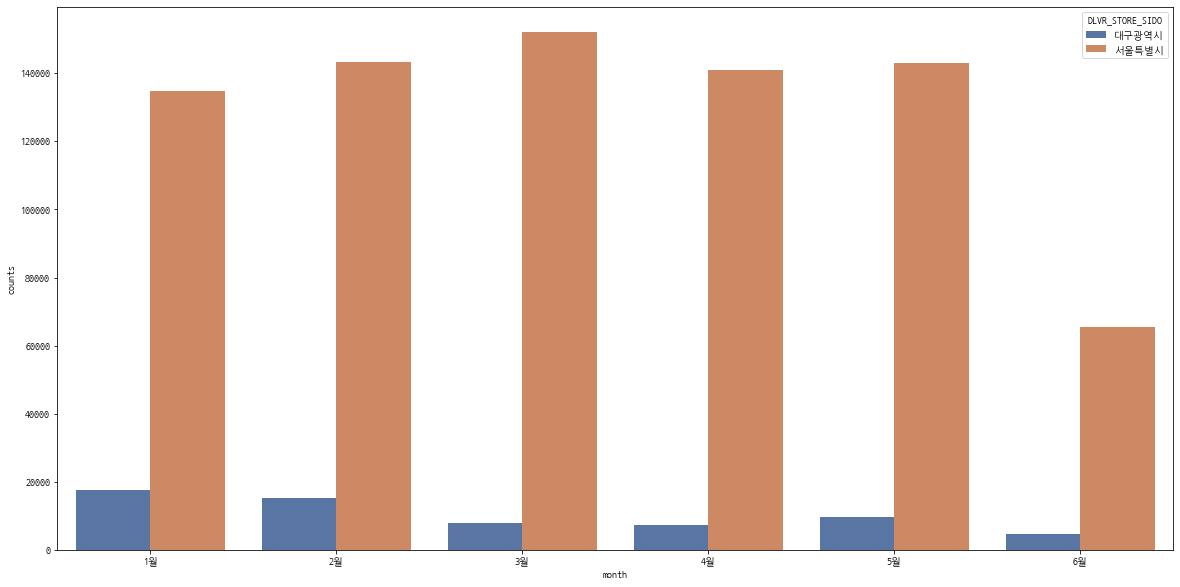

In [43]:
plt.figure(figsize = (20,10))
sns.barplot(data = deli_gr, x ='month', y ='counts', hue='DLVR_STORE_SIDO', palette="deep")
plt.show()

In [36]:
deli_sd.groupby(['DLVR_STORE_SIDO','DLVR_STORE_INDUTY_NM'])['DLVR_AMOUNT','counts'].sum()

C:\Users\sundooedu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


DLVR_AMOUNT  counts
DLVR_STORE_SIDO DLVR_STORE_INDUTY_NM                     
대구광역시           돈까스/일식                    9583150    2836
                분식                       35620900    9777
                심부름                         24000       8
                아시안/양식                    7642750    2075
                야식                         179000      53
                족발/보쌈                     4232050    1110
                중식                        5048000    1663
                찜탕                         797000     210
                치킨                        6861650    2037
                카페/디저트                  112479800   36404
                피자                         335600     111
                한식                       23787670    6677
서울특별시           도시락                      13410100    3691
                돈까스/일식                   83165680   22201
                배달전문업체                    4096000    1122
                분식                      404632160  109634
                아시안/양식                   89388840   23045
                야식                      123546430   31298
                족발/보쌈                   224731380   59204
                중식                       77936190   21550
                찜탕                       47254230   12497
                치킨                      795219770  211342
                카페/디저트                  273239230   78672
                패스트푸드                   320639430   92140
                피자                      155572510   41722
                한식                      220717772   58640
                회                        48166500   12698

In [44]:
induty_sd = deli_sd.groupby(['DLVR_STORE_SIDO','DLVR_STORE_INDUTY_NM'])['DLVR_AMOUNT','counts'].sum().reset_index(drop = False)
induty_sd

C:\Users\sundooedu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DLVR_STORE_SIDO,DLVR_STORE_INDUTY_NM,DLVR_AMOUNT,counts
0,대구광역시,돈까스/일식,9583150,2836
1,대구광역시,분식,35620900,9777
2,대구광역시,심부름,24000,8
3,대구광역시,아시안/양식,7642750,2075
4,대구광역시,야식,179000,53
5,대구광역시,족발/보쌈,4232050,1110
6,대구광역시,중식,5048000,1663
7,대구광역시,찜탕,797000,210
8,대구광역시,치킨,6861650,2037
9,대구광역시,카페/디저트,112479800,36404


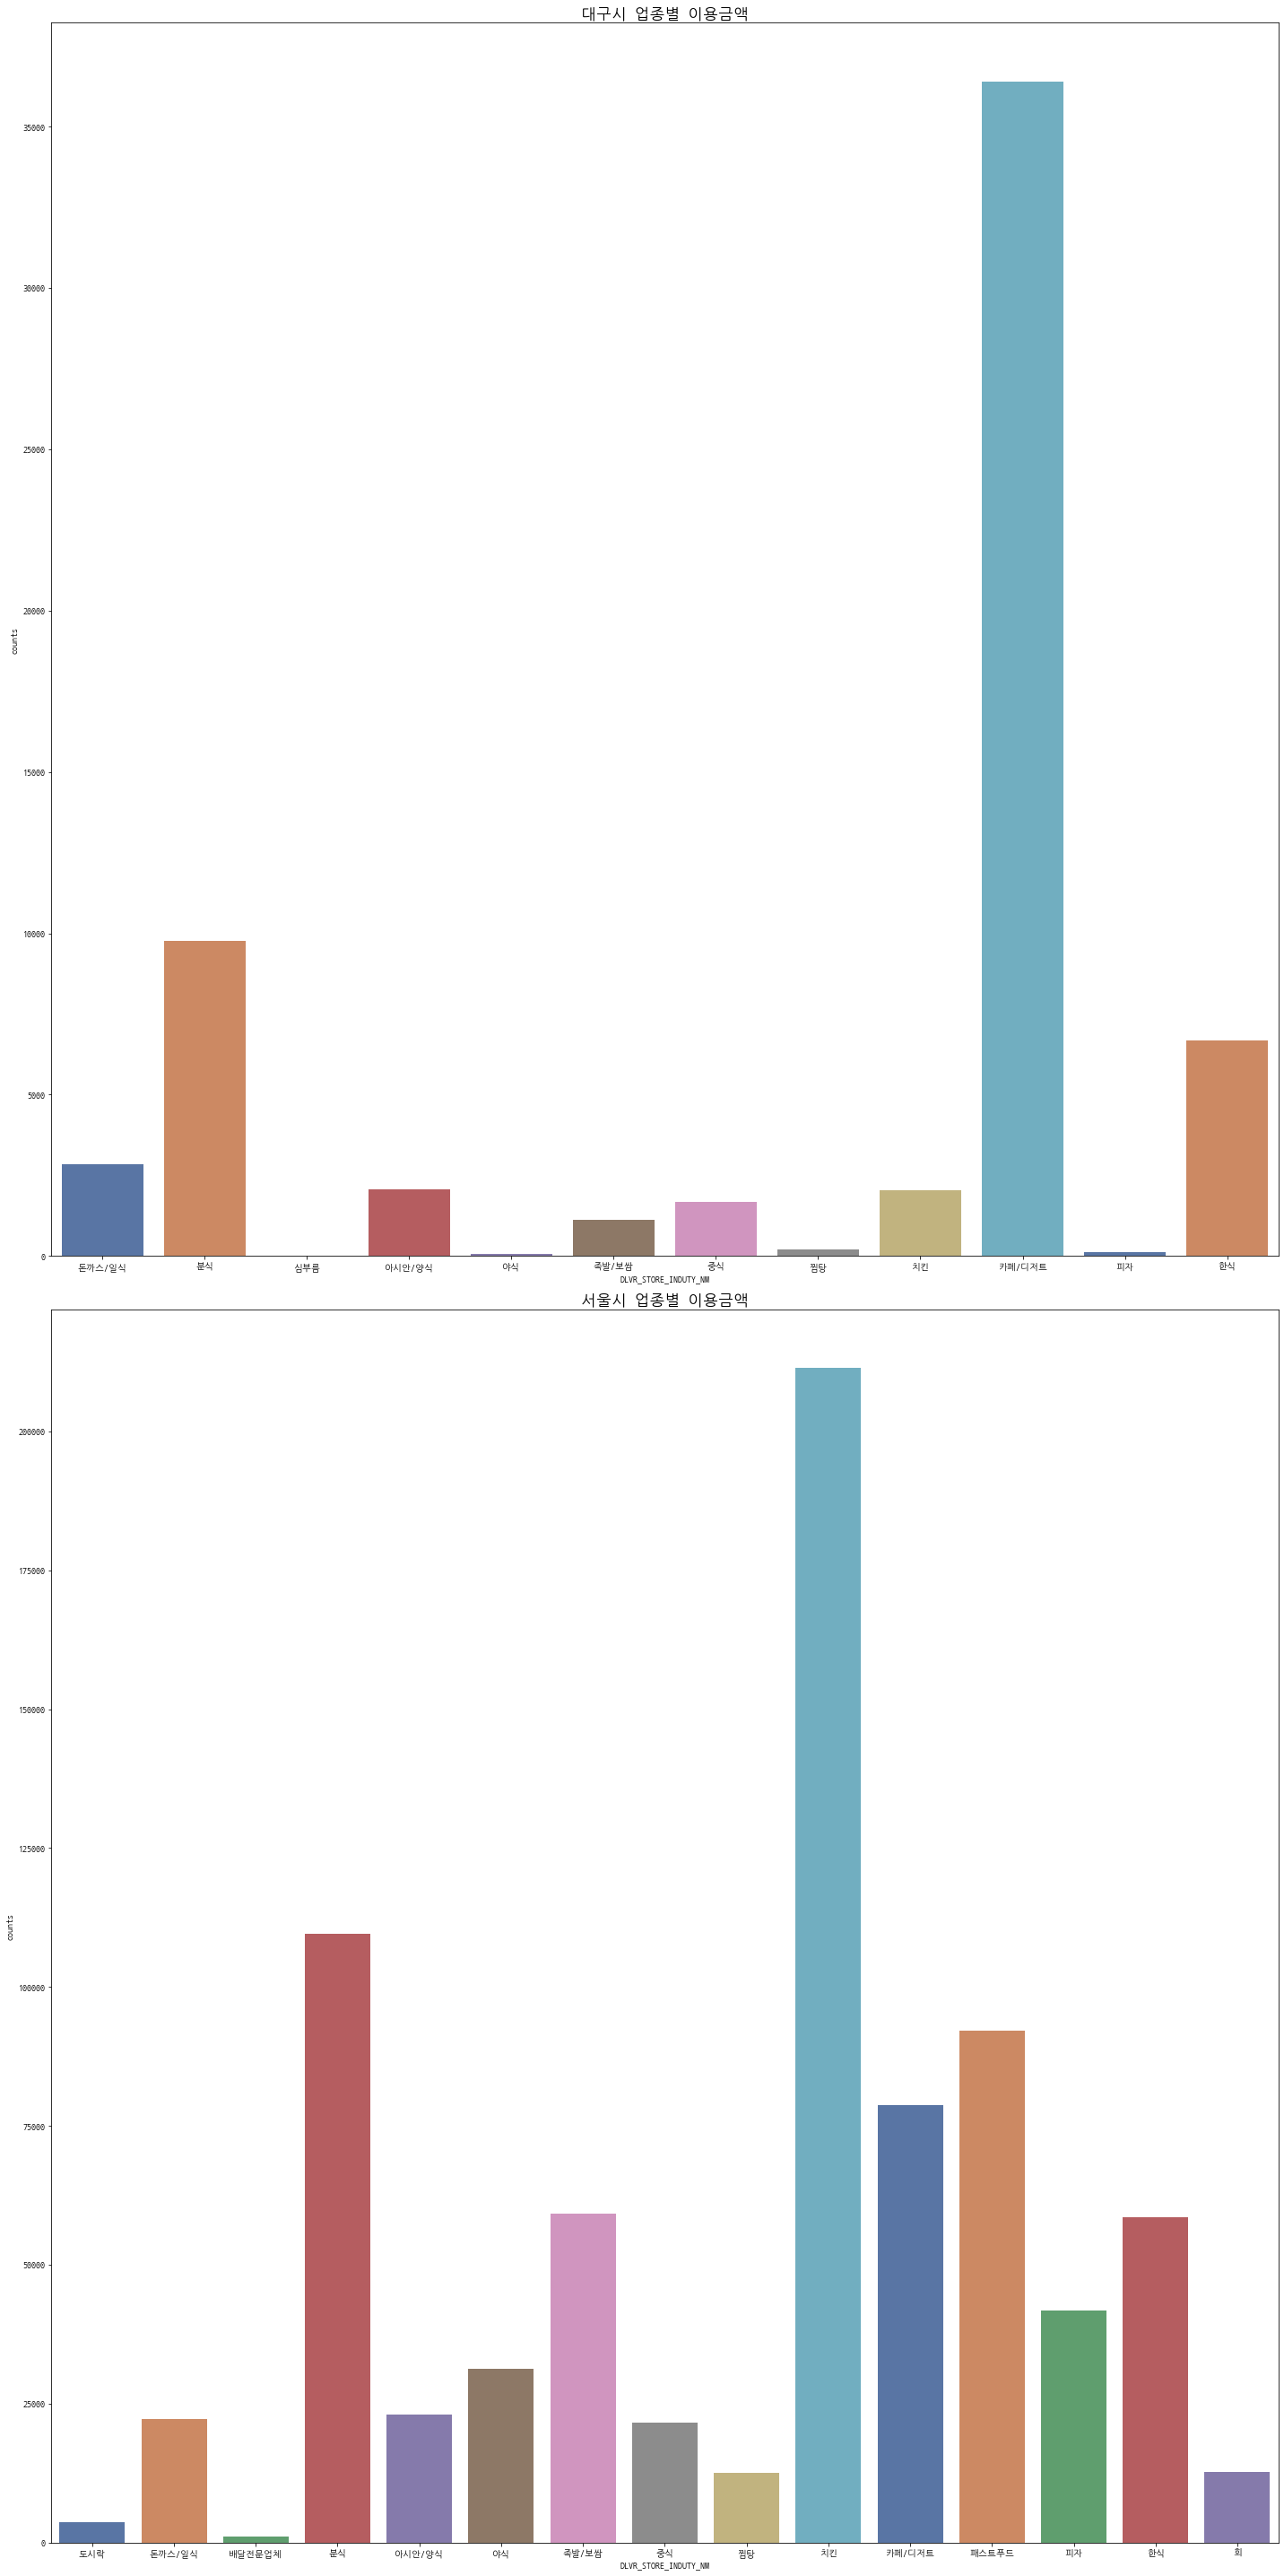

In [45]:
f,ax = plt.subplots(2,1,figsize=(20,40))

sns.barplot(data = induty_sd[induty_sd['DLVR_STORE_SIDO']=='대구광역시'], x ='DLVR_STORE_INDUTY_NM', y ='counts', palette='deep' ,ax=ax[0])
ax[0].set_title('대구시 업종별 이용금액', fontsize=17)

sns.barplot(data = induty_sd[induty_sd['DLVR_STORE_SIDO']=='서울특별시'], x ='DLVR_STORE_INDUTY_NM', y ='counts', palette='deep' ,ax=ax[1])
ax[1].set_title('서울시 업종별 이용금액', fontsize=17)

plt.tight_layout()
plt.show()

In [53]:
t_induty = deli_sd.groupby(['DLVR_STORE_SIDO','month','DLVR_STORE_INDUTY_NM']).counts.sum().reset_index(drop = False)
t_pivot_d = t_induty[t_induty['DLVR_STORE_SIDO']=='대구광역시'].pivot(index='DLVR_STORE_INDUTY_NM',columns='month',values='counts')
t_pivot_s = t_induty[t_induty['DLVR_STORE_SIDO']=='서울특별시'].pivot(index='DLVR_STORE_INDUTY_NM',columns='month',values='counts')

month                     1월      2월      3월      4월      5월      6월
DLVR_STORE_INDUTY_NM                                                
돈까스/일식                1600.0  1236.0     NaN     NaN     NaN     NaN
분식                    5783.0  3994.0     NaN     NaN     NaN     NaN
심부름                      8.0     NaN     NaN     NaN     NaN     NaN
아시안/양식                1294.0   781.0     NaN     NaN     NaN     NaN
야식                      31.0    22.0     NaN     NaN     NaN     NaN
족발/보쌈                  718.0   392.0     NaN     NaN     NaN     NaN
중식                     938.0   725.0     NaN     NaN     NaN     NaN
찜탕                     114.0    96.0     NaN     NaN     NaN     NaN
치킨                    1213.0   824.0     NaN     NaN     NaN     NaN
카페/디저트                3316.0  4894.0  7408.0  6994.0  9287.0  4505.0
피자                      62.0    46.0     3.0     NaN     NaN     NaN
한식                    2729.0  2269.0   519.0   464.0   530.0   166.0 month                    1월     2월

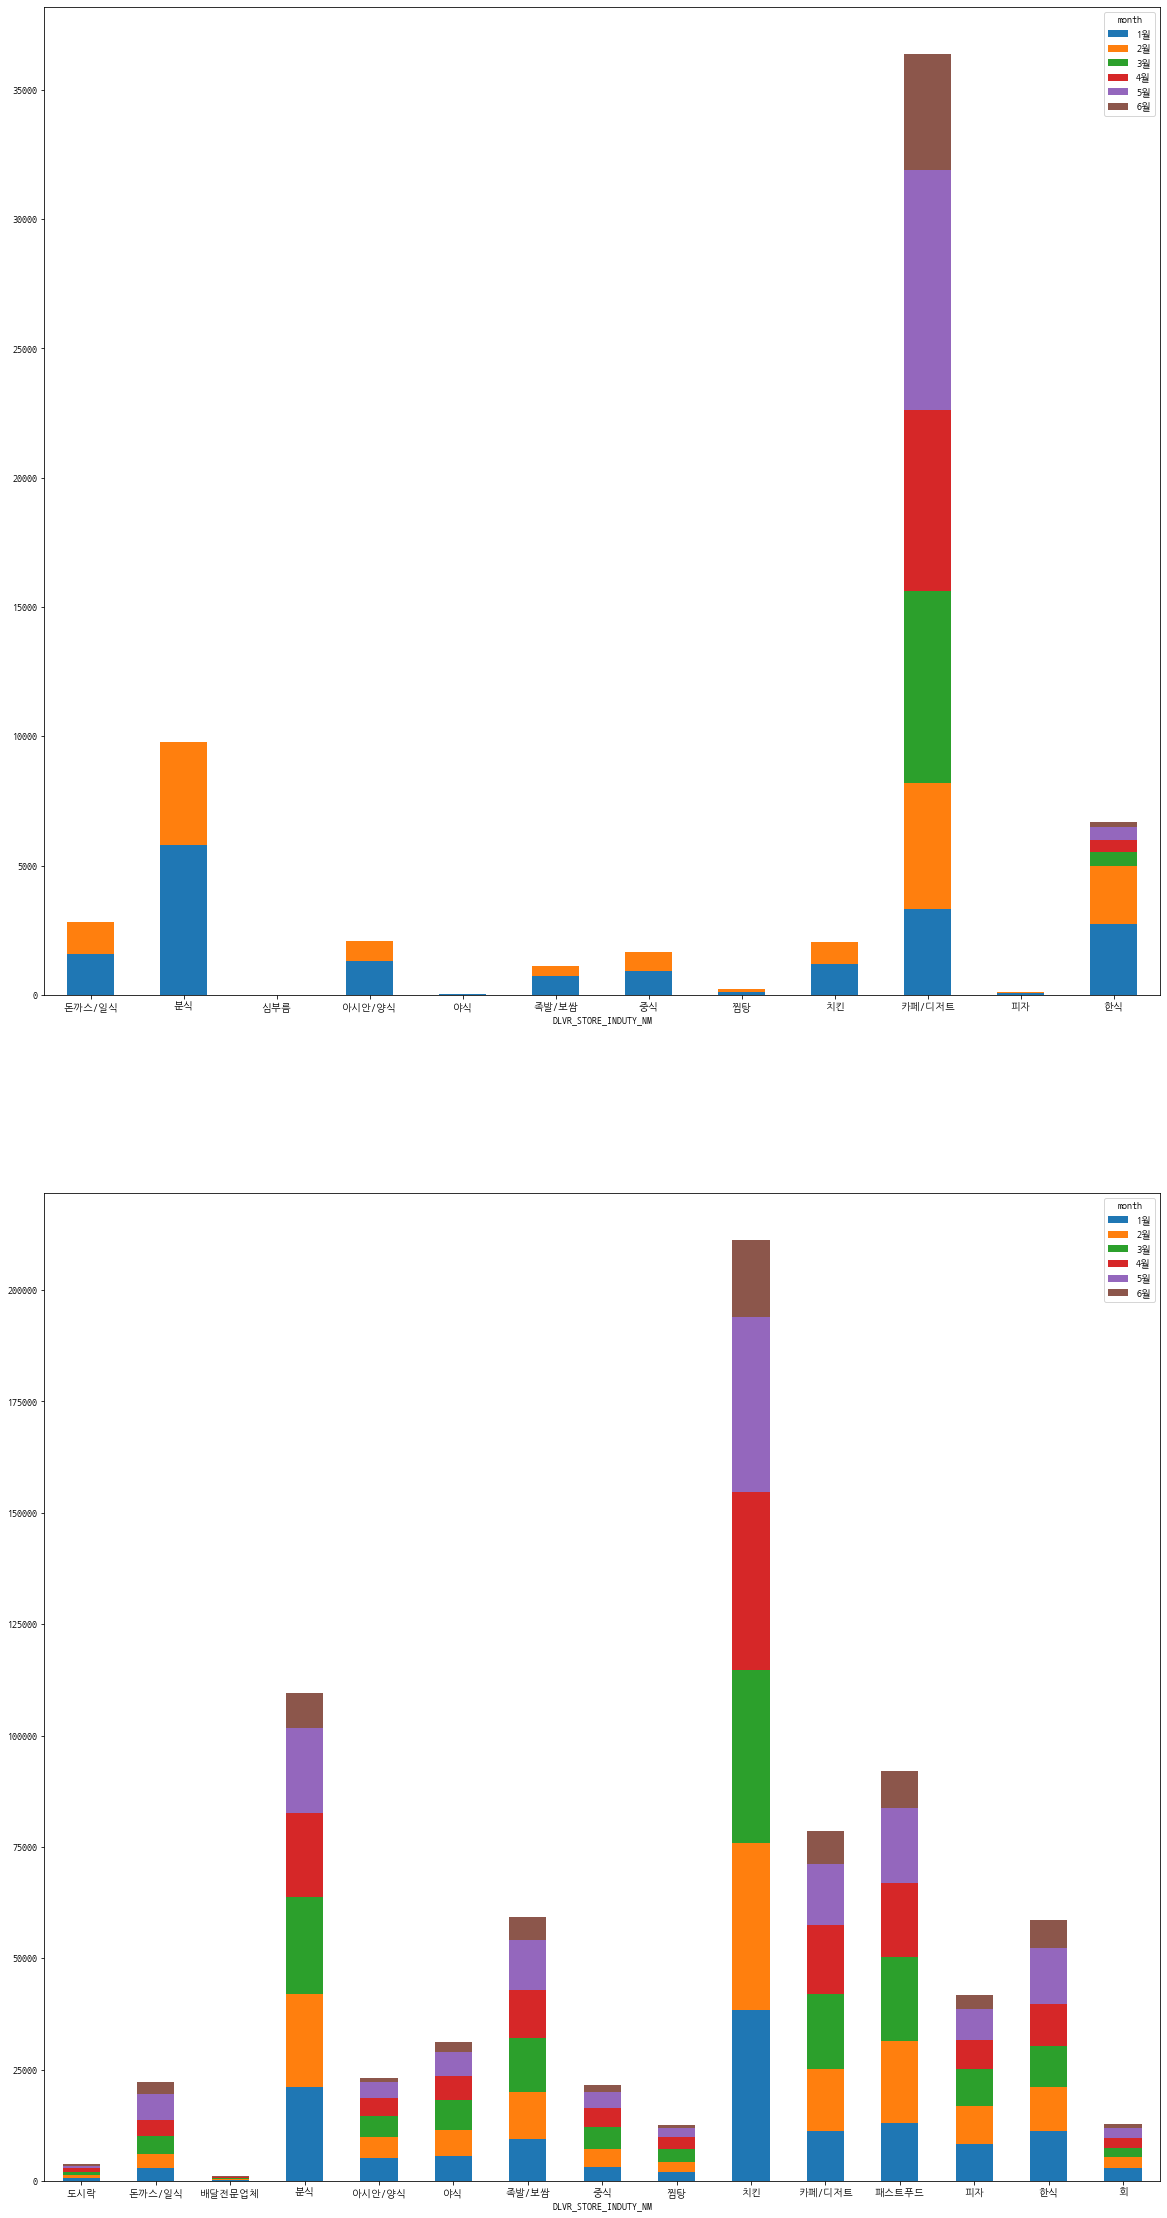

In [54]:
f,ax = plt.subplots(2,1,figsize=(20,40))
t_pivot_d.plot.bar(stacked=True, rot=0, ax=ax[0])
t_pivot_s.plot.bar(stacked=True, rot=0, ax=ax[1])
plt.show()

In [55]:
dg_deli = deli_sd[(deli_sd['DLVR_STORE_SIDO']=='대구광역시')]
sl_deli = deli_sd[(deli_sd['DLVR_STORE_SIDO']=='서울특별시')]

In [57]:
dg_deli

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,month,counts
14,4578003,2020-01-01,C000010,1,C000010,S0000458,치킨,2726011100,대구광역시,수성구,...,300,18000,1,승인:롯데카드사,2020-01-01 00:07:10,2020-01-01 00:07:25,2020-01-01 00:24:14,NaN,1월,1
61,4578058,2020-01-01,C000010,1,C000010,S0002395,분식,2726010700,대구광역시,수성구,...,300,13000,3,NaN,2020-01-01 00:47:41,2020-01-01 00:48:40,2020-01-01 00:59:31,NaN,1월,1
172,4578190,2020-01-01,C000010,1,C000010,S0001667,분식,2726011200,대구광역시,수성구,...,300,16000,2,NaN,2020-01-01 00:53:38,2020-01-01 00:54:16,2020-01-01 01:03:45,NaN,1월,1
176,4578194,2020-01-01,C000010,1,C000010,S0001667,분식,2726011200,대구광역시,수성구,...,300,23500,2,NaN,2020-01-01 01:33:17,2020-01-01 01:33:43,2020-01-01 01:43:26,NaN,1월,1
255,4578282,2020-01-01,C000010,1,C000010,S0001667,분식,2726011200,대구광역시,수성구,...,300,26000,2,NaN,2020-01-01 00:22:01,2020-01-01 00:23:05,2020-01-01 00:35:42,NaN,1월,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157610,10671865,2020-06-21,C000032,1,C000447,S0000573,카페/디저트,2729010700,대구광역시,달서구,...,300,16400,2,NaN,2020-06-21 22:47:46,2020-06-21 22:48:15,2020-06-21 22:58:11,NaN,6월,1
5157941,10672254,2020-06-21,C000032,1,C000517,S0000580,카페/디저트,2729011500,대구광역시,달서구,...,300,22300,2,NaN,2020-06-21 22:53:50,2020-06-21 22:55:23,2020-06-21 23:00:31,NaN,6월,1
5158187,10672535,2020-06-21,C000032,1,C000393,S0000563,카페/디저트,2729011300,대구광역시,달서구,...,200,15500,2,NaN,2020-06-21 23:05:56,2020-06-21 23:06:23,2020-06-21 23:10:59,NaN,6월,1
5158262,10672622,2020-06-21,C000032,1,C000447,S0000583,한식,2771025628,대구광역시,달성군,...,300,15500,2,NaN,2020-06-21 23:01:54,2020-06-21 23:02:18,2020-06-21 23:05:12,NaN,6월,1


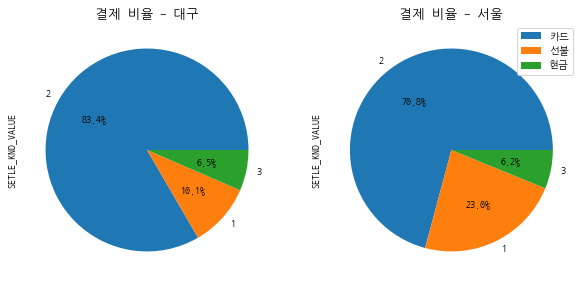

In [58]:
f,ax = plt.subplots(1,2,figsize=(10,7))

dg_deli.SETLE_KND_VALUE.value_counts().plot.pie(autopct = '%1.1f%%', figsize = [10,7], ax = ax[0])
ax[0].set_title('결제 비율 - 대구', fontsize = 13)

sl_deli.SETLE_KND_VALUE.value_counts().plot.pie(autopct = '%1.1f%%', figsize = [10,7], ax = ax[1])
ax[1].set_title('결제 비율 - 서울', fontsize = 13)

plt.legend(['카드', '선불','현금'])
plt.show()

In [61]:
p_induty = deli_sd.groupby(['DLVR_STORE_SIDO','month','SETLE_KND_VALUE']).counts.sum().reset_index(drop = False)
p_pivot_d = p_induty[p_induty['DLVR_STORE_SIDO']=='대구광역시'].pivot(index='month',columns='SETLE_KND_VALUE',values='counts')
p_pivot_s = p_induty[p_induty['DLVR_STORE_SIDO']=='서울특별시'].pivot(index='month',columns='SETLE_KND_VALUE',values='counts')

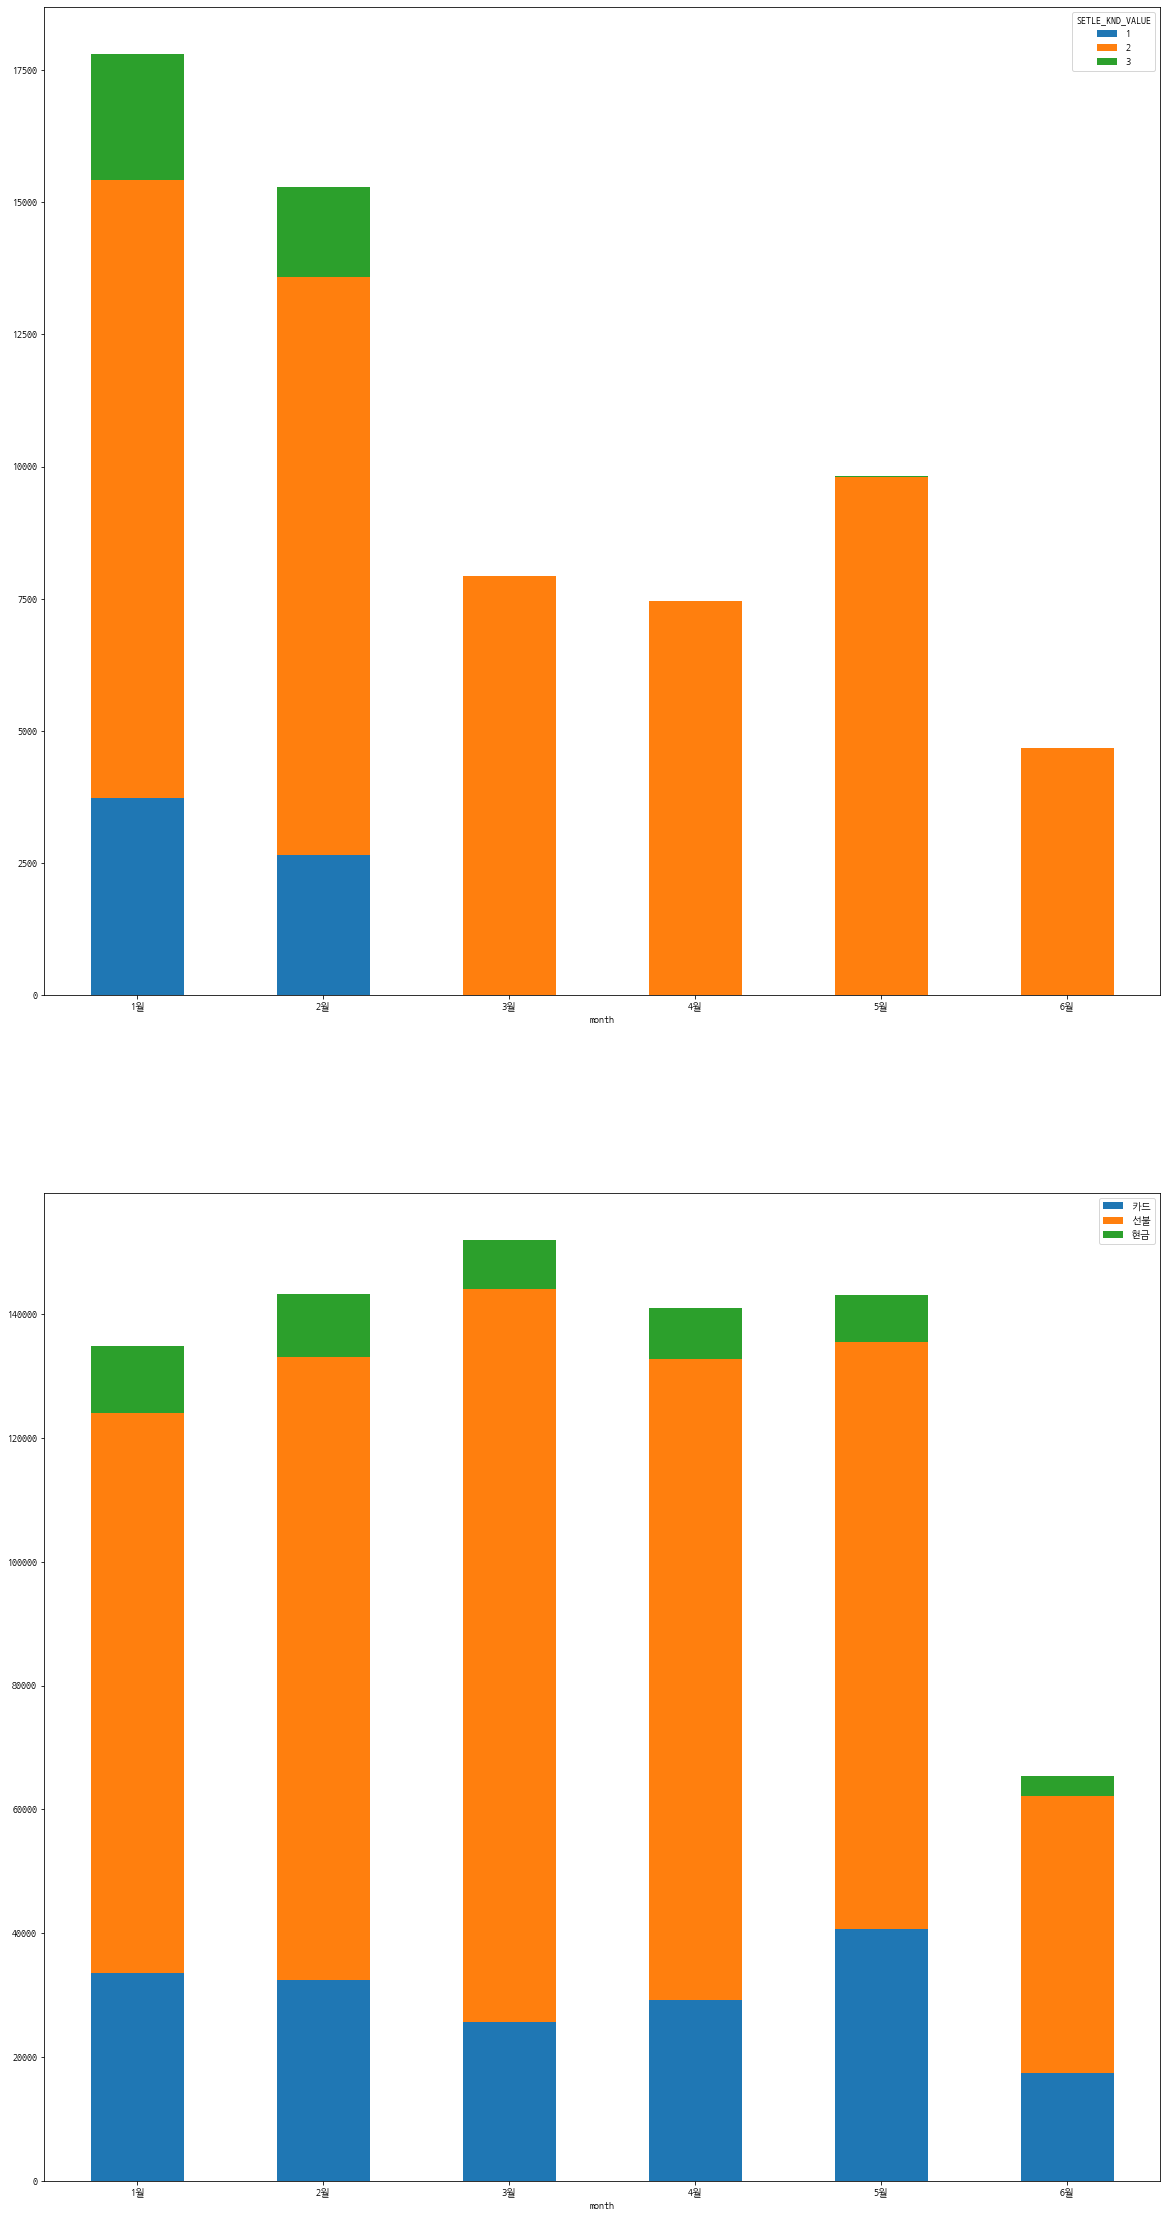

In [63]:
f,ax = plt.subplots(2,1,figsize=(20,40))
p_pivot_d.plot.bar(stacked=True, rot=0, ax=ax[0])
p_pivot_s.plot.bar(stacked=True, rot=0, ax=ax[1])

plt.legend(['카드', '선불','현금'])
plt.show()